<a href="https://colab.research.google.com/github/Hiroki-Abe/Weibull_curve_fit/blob/main/Weibull%20fitting/Weibull%20fitting%20(curve_fit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm as tqdm

データ読み込み

読み込みファイル名を変更して、複数のデータに対応させる。

time, logS, s.d.のラベルは変更しない。
変更すると読み込みにエラーが発生する。
修正できるのであれば変更可

In [ ]:
datafile_name = 'Weibull_data.csv'
data = pd.read_csv(datafile_name)
data

,time,logS,s.d.
0,0,-0.001373,0.042712
1,5,-0.023376,0.030299
2,10,-0.088736,0.042068
3,15,-0.160058,0.096942
4,20,-0.266502,0.082486
5,25,-0.371345,0.097527
6,30,-0.750934,0.349650
7,35,-1.512739,0.493123
8,40,-2.581027,0.588358
9,45,-3.191143,0.441456


データを扱いやすい形に分ける

In [ ]:
x_data = data['time']
y_data = data['logS']
y_sd = data['s.d.']

予測モデル（数式）の定義
今回はWeibullモデル

In [ ]:
def func(x, delta, power):
    f = -(x/delta)**power
    return f

curve_fit（最小二乗法）を使って非線形回帰
para_predにパラメータ(delta, powerの順番)、covに共分散が保存される。

In [ ]:
para_pred, cov = curve_fit(func,x_data,y_data)
para_pred

array([31.52220862,  3.54680689])

予測用の数列作成
time_intervalには0からデータの時間最大値まで１００分割した数列が入る。

In [ ]:
time_min = 0
time_max = np.max(data['time'])
devide = 100
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")

予測値の計算
time_intervalにに対応する予測値をy_predに代入

In [ ]:
y_pred = func(time_interval, para_pred[0], para_pred[1])

作図　＆　pdf保存
pdfは「データファイル名.pdf」で保存される。

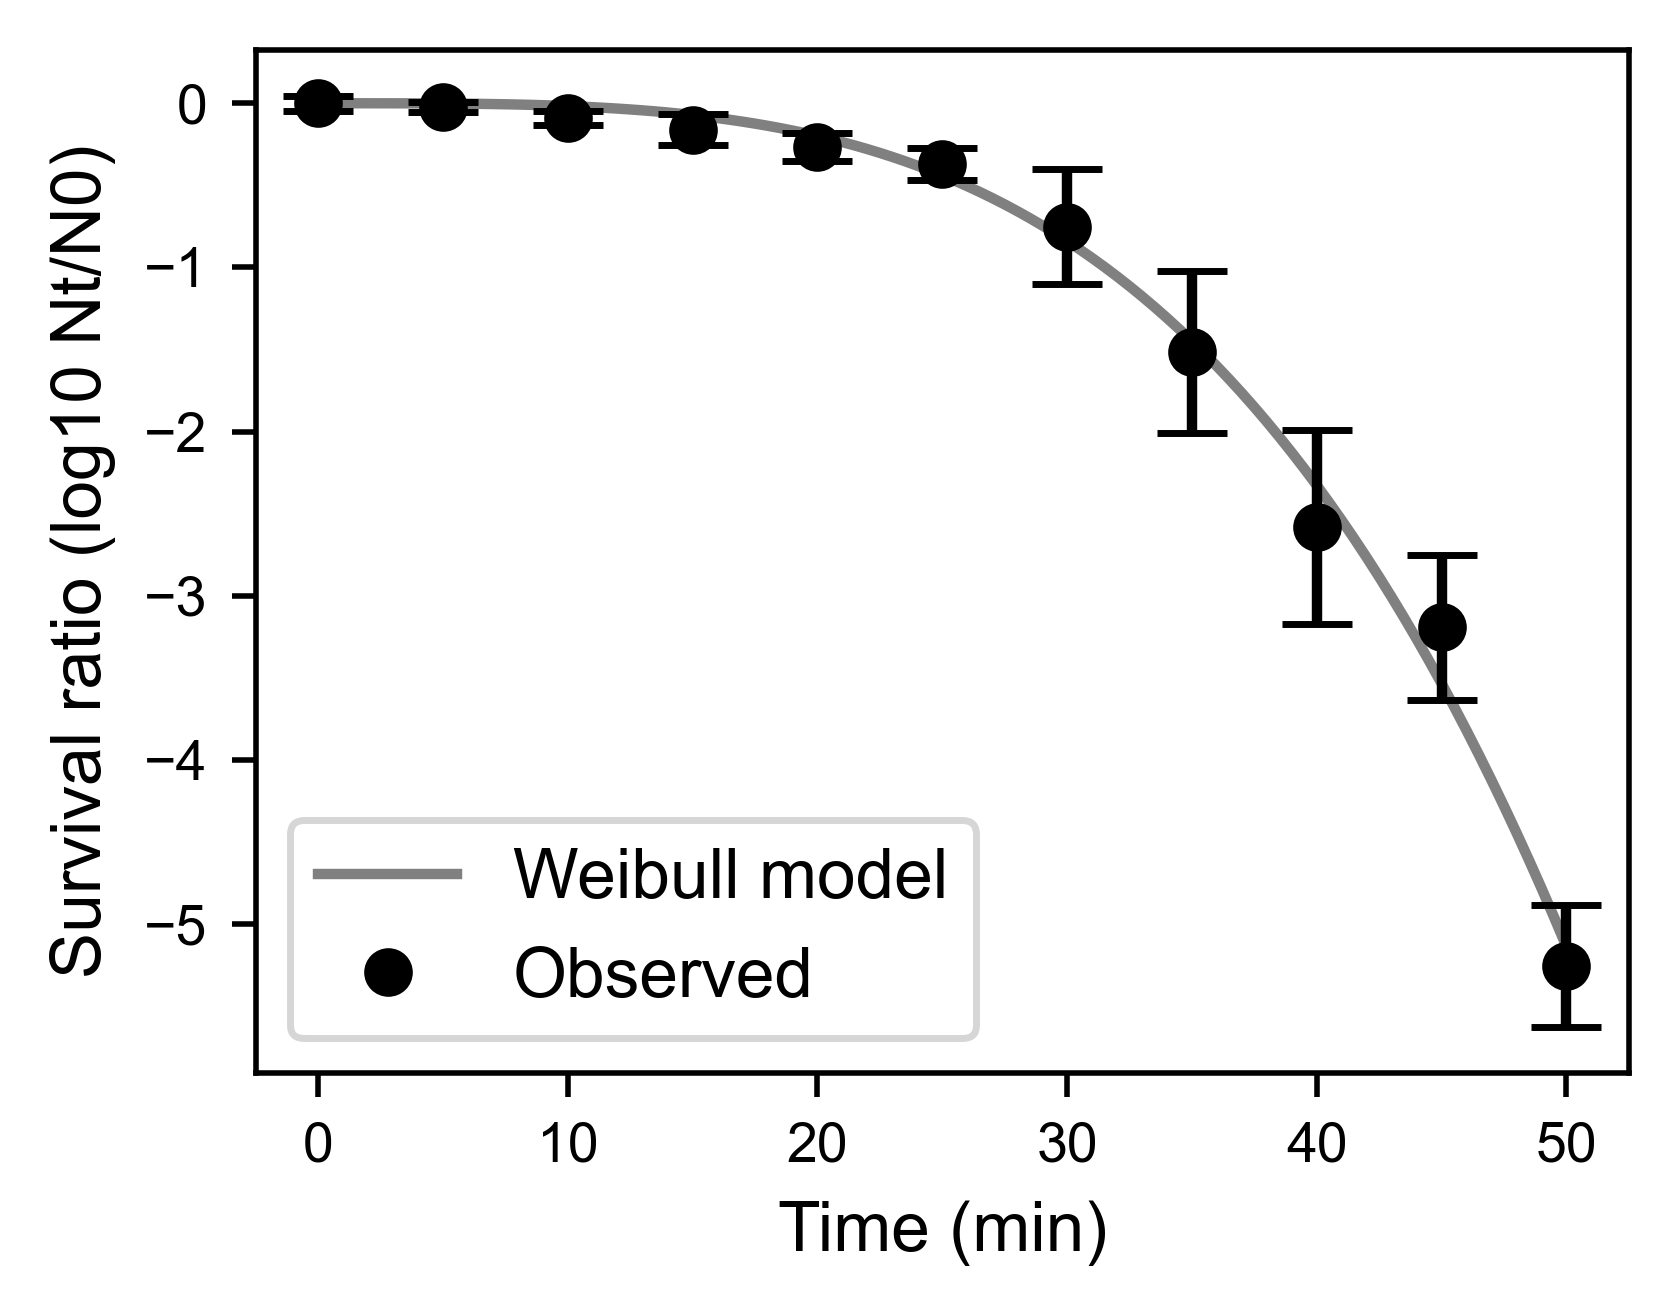

In [ ]:
plt.figure(figsize=(9*0.393701,9*0.393701*3/4), dpi=500)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=8)
plt.yticks(size=8)
plt.xlabel("Time (min)",size=10,fontname="Arial")
plt.ylabel("Survival ratio (log10 Nt/N0)",size=10,fontname="Arial")

plt.plot(time_interval, y_pred, color='gray', label='Weibull model' )
plt.errorbar(data['time'], data['logS'], yerr=y_sd, fmt="none", color='black', capsize = 5)

plt.plot(data['time'], data['logS'], lw=0, marker='o', color='black', label='Observed')

plt.legend()

plt.savefig(datafile_name.replace('.csv', '.pdf'), bbox_inches="tight", dpi=500)

plt.show()

RMSEの計算（平均値からのRMSE）

In [ ]:
y_pred_RMSE = func(data['time'], para_pred[0], para_pred[1])
errors = data['logS']-y_pred_RMSE
RMSE = (np.sum(errors**2))**0.5
print(RMSE)

0.4804011267918947
